In [1]:
import pandas as pd
from Bio import PDB
import os
os.chdir('..')
from functions.myfunctions import *
import functions.distancefunctions as df
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import networkx as nx

In [2]:
def plot_graph(nodes_list, edges, name):
    cdr1 = [str(x) for x in list(range(27,37))]
    cdr2 = [str(x) for x in list(range(56,66))]
    cdr3 = [str(x) for x in list(range(105,118))]
    
    G = nx.Graph()
    group_numbers = {'cdr1a':0,'cdr2a':0.15,'cdr3a':0.3,'cdr3b':0.7,'cdr2b':0.85,'cdr1b':1}
    positions = {'cdr1a':cdr1,'cdr2a':cdr2,'cdr3a':cdr3,'cdr3b':cdr3,'cdr2b':cdr2,'cdr1b':cdr1}
    incr = {'cdr1a':0,'cdr2a':len(cdr1) + 1 + len(cdr3) + 1,'cdr3a':len(cdr1) + 1,
            'cdr1b':0,'cdr2b':len(cdr1) + 1 + len(cdr3) + 1,'cdr3b':len(cdr1) + 1}
    colors = {'cdr1a':'royalblue','cdr2a':'royalblue','cdr3a':'royalblue','cdr3b':'red','cdr2b':'red','cdr1b':'red'}
    # print(positions)
    for n in nodes_list:
        if n.split('_')[0] == 'a':
            l = 'cdr1a' if n.split('_')[1] in cdr1 else 'cdr2a' if n.split('_')[1] in cdr2 else 'cdr3a'
        elif n.split('_')[0] == 'b':
            l = 'cdr1b' if n.split('_')[1] in cdr1 else 'cdr2b' if n.split('_')[1] in cdr2 else 'cdr3b'
        # print(n, l)
        group_number = group_numbers[l]
        x = incr[l]
        i = positions[l].index(n.split('_')[1]) + x
        # print(i, group_number)
        G.add_node(n,layer=l, pos = (group_number, i), col = colors[l])
    for e in edges:
        G.add_edge(*e)

    # plot graph
    # pos = nx.multipartite_layout(G, subset_key="layer",)
    plt.figure(figsize=(10, 10))
    # my_pos = make_node_positions(G,partition_attr='partition',partition_order=['cdr1a','cdr2a','cdr3a','cdr1b','cdr2b','cdr3b'])
    nx.draw_networkx(G, with_labels=False, pos=nx.get_node_attributes(G, 'pos'), 
                    node_color=[G.nodes[node]['col'] for node in G.nodes()],
                    width=0.5, node_size=150)
    plt.text(0, -1, r'CDR1$\alpha$', ha = 'center', va='top', fontsize=16)
    plt.text(0.15, len(cdr1) + len(cdr3) + len(cdr2) + 2 + 1, r'CDR2$\alpha$', ha = 'center', va='top', fontsize=16)
    plt.text(0.3, len(cdr1) + 2 - 2, r'CDR3$\alpha$', ha = 'center', va='top', fontsize=16)

    plt.text(1, -1, r'CDR1$\beta$', ha = 'center', va='top', fontsize=16)
    plt.text(0.85, len(cdr1) + len(cdr3) + len(cdr2) + 2 + 1, r'CDR2$\beta$', ha = 'center', va='top', fontsize=16)
    plt.text(0.7, len(cdr1) + 2 - 2, r'CDR3$\beta$', ha = 'center', va='top', fontsize=16)

    plt.text(0,0,'27',ha='center',va='center', fontsize=14)
    plt.text(0,len(cdr1)-1,'36',ha='center',va='center', fontsize=14)
    plt.text(0.15,len(cdr1) + len(cdr3) + 2,'56',ha='center',va='center', fontsize=14)
    plt.text(0.15,len(cdr1) + len(cdr3) + len(cdr2) + 1,'65',ha='center',va='center', fontsize=14)
    plt.text(0.3,len(cdr1) + 1,'105',ha='center',va='center', fontsize=14)
    plt.text(0.3,len(cdr1) + len(cdr3),'117',ha='center',va='center', fontsize=14)

    plt.text(1,0,'27',ha='center',va='center', fontsize=14)
    plt.text(1,len(cdr1)-1,'36',ha='center',va='center', fontsize=14)
    plt.text(0.85,len(cdr1) + len(cdr3) + 2,'56',ha='center',va='center', fontsize=14)
    plt.text(0.85,len(cdr1) + len(cdr3) + len(cdr2) + 1,'65',ha='center',va='center', fontsize=14)
    plt.text(0.7,len(cdr1) + 1,'105',ha='center',va='center', fontsize=14)
    plt.text(0.7,len(cdr1) + len(cdr3),'117',ha='center',va='center', fontsize=14)

    plt.title(name.upper(), fontsize=20)
    plt.tight_layout()
    plt.savefig('figures/' + name + '_contacts_graph.png')
    plt.show()

In [3]:
structures_dir = '../data/structures/stcrdab_all_structures/imgt/'
datalist = pd.read_csv('data/tcrdbset_unique_receptors.csv', index_col=0).drop_duplicates(subset = ['pdb'], keep='first')
datalist1 = pd.read_csv('data/tcrdb_export_cleaned.csv', index_col=0).drop_duplicates(subset = ['pdb'], keep='first')

In [4]:
p = PDB.PDBParser()

inter_distances = {}

for pdb in ['3qh3','6cph','3dx9','2ial']:
    for ppdb in pdb.split(','):
        ppdb = ppdb.strip('[]\' ')
        s = ppdb + '.pdb'
        print(ppdb)

        struc = p.get_structure(ppdb, structures_dir + s)
        achain = list(datalist1.loc[datalist1.pdb == ppdb]['Achain'])[0]
        bchain = list(datalist1.loc[datalist1.pdb == ppdb]['Bchain'])[0]

        d = df.CA_pairwise_distances(struc[0][achain],struc[0][bchain])
        inter_distances[ppdb] = d

3qh3
6cph
3dx9
2ial


In [5]:
p = PDB.PDBParser()

intra_distances_a = {}
intra_distances_b = {}

for pdb in ['3qh3','6cph','3dx9','2ial']:
    for ppdb in pdb.split(','):
        ppdb = ppdb.strip('[]\' ')
        s = ppdb + '.pdb'
        print(ppdb)

        struc = p.get_structure(ppdb, structures_dir + s)
        achain = list(datalist1.loc[datalist1.pdb == ppdb]['Achain'])[0]
        bchain = list(datalist1.loc[datalist1.pdb == ppdb]['Bchain'])[0]

        d = df.CA_pairwise_distances(struc[0][achain],struc[0][achain])
        intra_distances_a[ppdb] = d
        d = df.CA_pairwise_distances(struc[0][bchain],struc[0][bchain])
        intra_distances_b[ppdb] = d

3qh3
6cph
3dx9
2ial


In [6]:
cdr1 = [str(x) for x in list(range(27,37))]
cdr2 = [str(x) for x in list(range(56,66))]
cdr3 = [str(x) for x in list(range(105,118))]

In [7]:
DF_a = {}

for pdb in ['3qh3','6cph','3dx9','2ial']:
    pdb_df = pd.DataFrame(index=['cdr1a','cdr2a','cdr3a','cdr1b','cdr2b','cdr3b'], columns=cdr1+cdr2+cdr3).fillna(0)
    # print(pdb_df)
    for resp in intra_distances_a[pdb].keys():
        res1,res2 = resp
        # print(res1,res2)
        if intra_distances_a[pdb][resp] < 10:
            if (res2 in cdr1) and (res1 in pdb_df.columns):
                pdb_df.at['cdr1a',res1] = pdb_df.loc['cdr1a',res1] + 1
            elif (res2 in cdr2) and (res1 in pdb_df.columns):
                pdb_df.at['cdr2a',res1] = pdb_df.loc['cdr2a',res1] + 1
            elif (res2 in cdr3) and (res1 in pdb_df.columns):
                pdb_df.at['cdr3a',res1] = pdb_df.loc['cdr3a',res1] + 1

    for resp in inter_distances[pdb].keys():
        res1,res2 = resp
        # print(res1,res2)
        if inter_distances[pdb][resp] < 10:
            if (res2 in cdr1) and (res1 in pdb_df.columns):
                pdb_df.at['cdr1b',res1] = pdb_df.loc['cdr1b',res1] + 1
            elif (res2 in cdr2) and (res1 in pdb_df.columns):
                pdb_df.at['cdr2b',res1] = pdb_df.loc['cdr2b',res1] + 1
            elif (res2 in cdr3) and (res1 in pdb_df.columns):
                pdb_df.at['cdr3b',res1] = pdb_df.loc['cdr3b',res1] + 1
        DF_a[pdb] = pdb_df

In [8]:
DF_b = {}

for pdb in ['3qh3','6cph','3dx9','2ial']:
    pdb_df = pd.DataFrame(index=['cdr1a','cdr2a','cdr3a','cdr1b','cdr2b','cdr3b'], columns=cdr1+cdr2+cdr3).fillna(0)
    # print(pdb_df)
    for resp in intra_distances_b[pdb].keys():
        res1,res2 = resp
        # print(res1,res2)
        if intra_distances_b[pdb][resp] < 10:
            if (res2 in cdr1) and (res1 in pdb_df.columns):
                pdb_df.at['cdr1b',res1] = pdb_df.loc['cdr1b',res1] + 1
            elif (res2 in cdr2) and (res1 in pdb_df.columns):
                pdb_df.at['cdr2b',res1] = pdb_df.loc['cdr2b',res1] + 1
            elif (res2 in cdr3) and (res1 in pdb_df.columns):
                pdb_df.at['cdr3b',res1] = pdb_df.loc['cdr3b',res1] + 1

    for resp in inter_distances[pdb].keys():
        res1,res2 = resp
        # print(res1,res2)
        if inter_distances[pdb][resp] < 10:
            if (res1 in cdr1) and (res2 in pdb_df.columns):
                pdb_df.at['cdr1a',res2] = pdb_df.loc['cdr1a',res2] + 1
            elif (res1 in cdr2) and (res2 in pdb_df.columns):
                pdb_df.at['cdr2a',res2] = pdb_df.loc['cdr2a',res2] + 1
            elif (res1 in cdr3) and (res2 in pdb_df.columns):
                pdb_df.at['cdr3a',res2] = pdb_df.loc['cdr3a',res2] + 1
        DF_b[pdb] = pdb_df

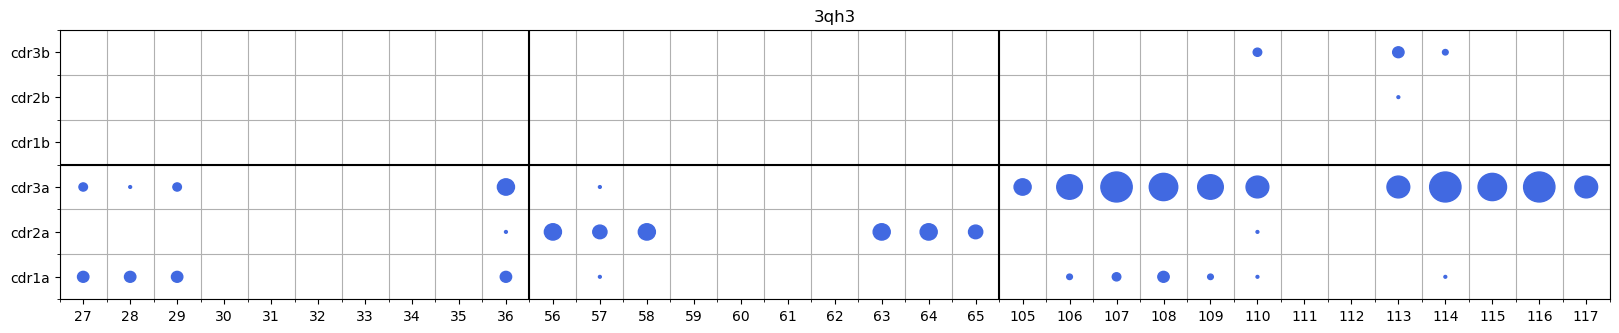

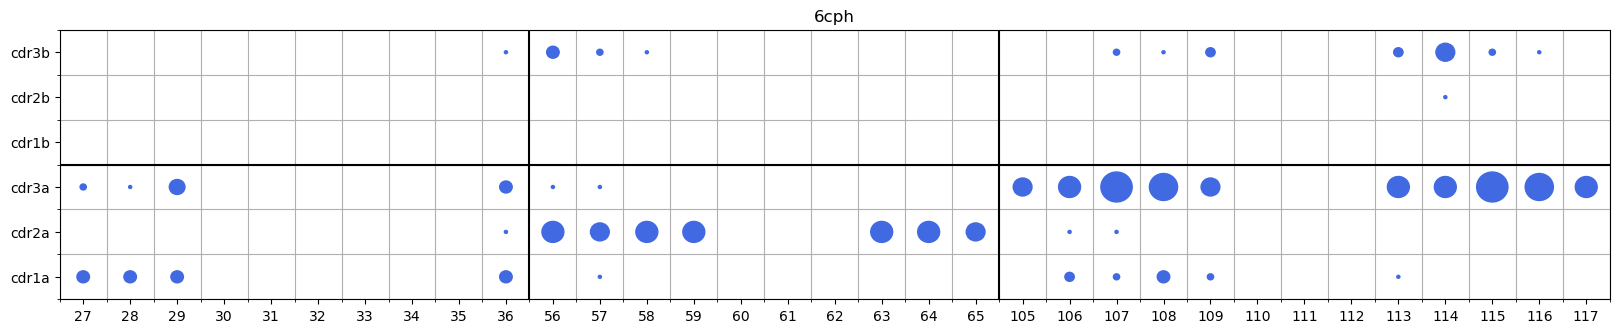

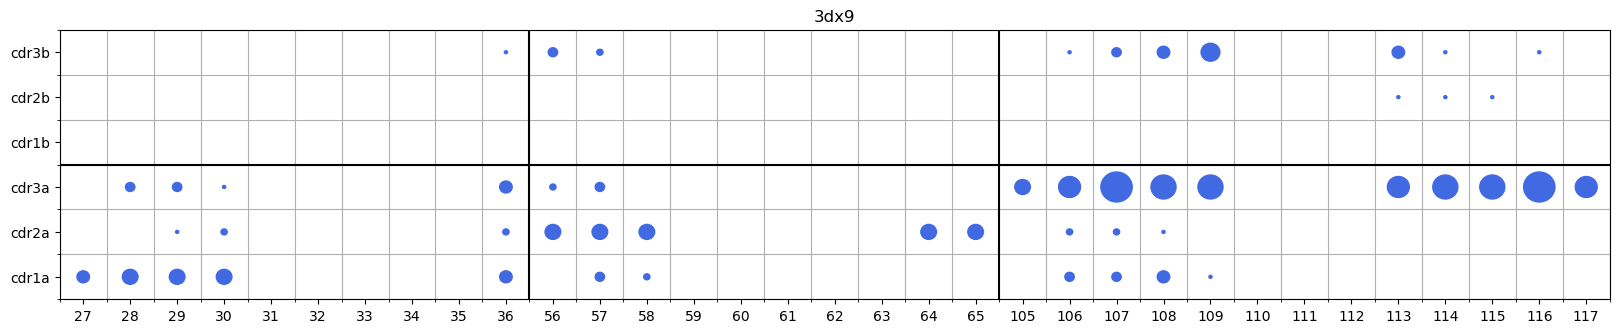

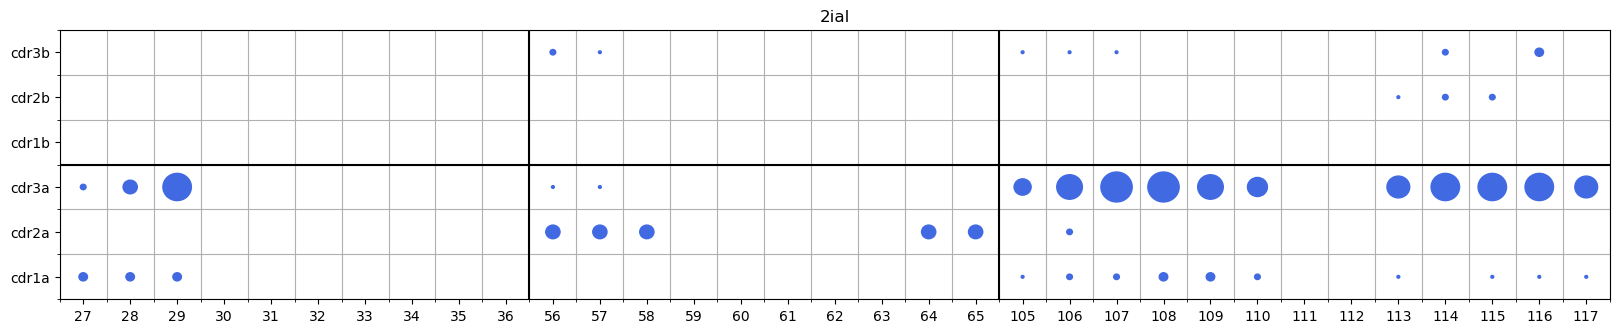

In [9]:
for pdb in ['3qh3','6cph','3dx9','2ial']:
       pdb_df = DF_a[pdb]
       N,M = pdb_df.shape
       ylabels = pdb_df.index
       xlabels = pdb_df.columns

       x, y = np.meshgrid(np.arange(M), np.arange(N))
       s = pdb_df.values
       c = np.random.rand(N, M)-0.5

       fig, ax = plt.subplots(figsize=(20,3.5))

       R = s/s.max()/3
       circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
       col = PatchCollection(circles, color='royalblue')
       ax.add_collection(col)

       ax.set(xticks=np.arange(M), yticks=np.arange(N),
              xticklabels=xlabels, yticklabels=ylabels)
       ax.set_xticks(np.arange(M+1)-0.5, minor=True)
       ax.set_yticks(np.arange(N+1)-0.5, minor=True)
       ax.grid(which='minor')
       ax.axhline(2.5, c='k')
       ax.axvline(9.5, c='k')
       ax.axvline(19.5, c='k')

       # fig.colorbar(col)
       plt.title(pdb)
       plt.show()

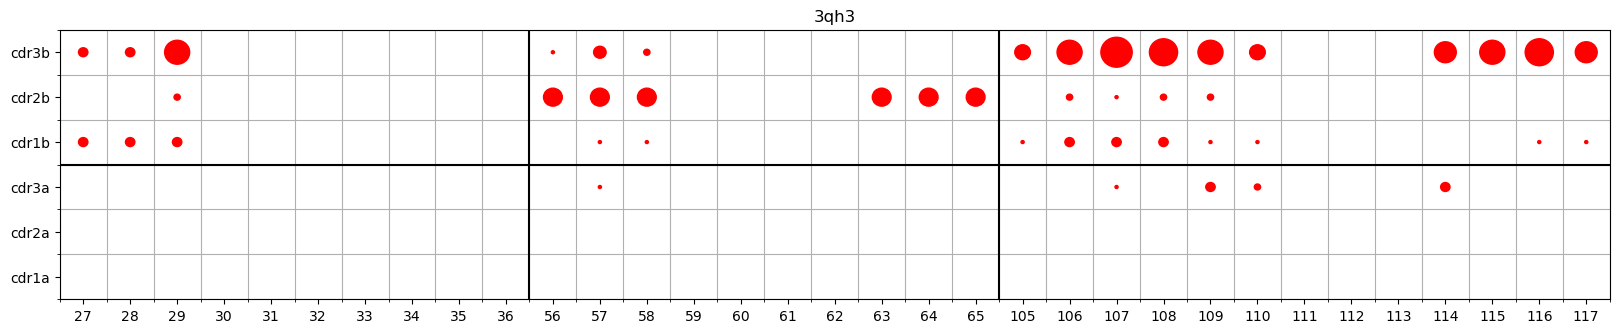

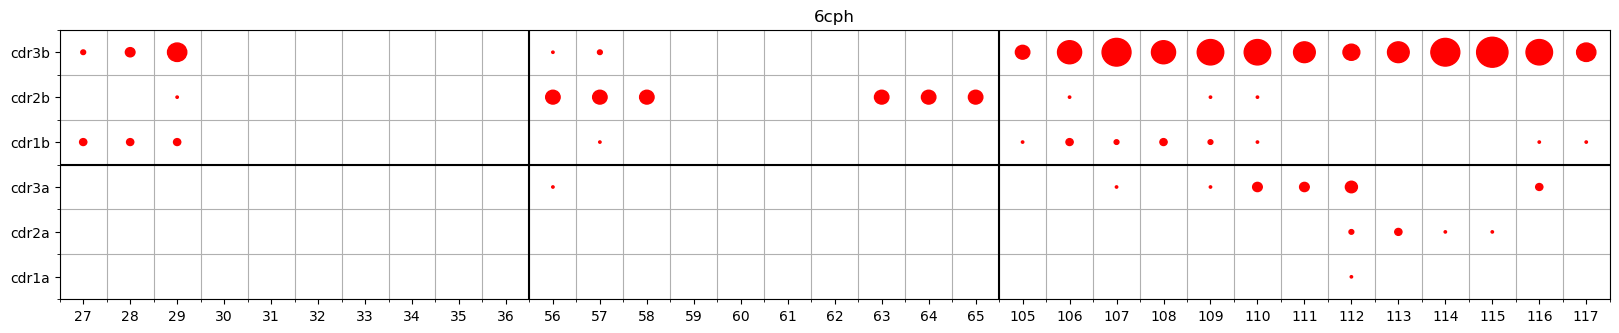

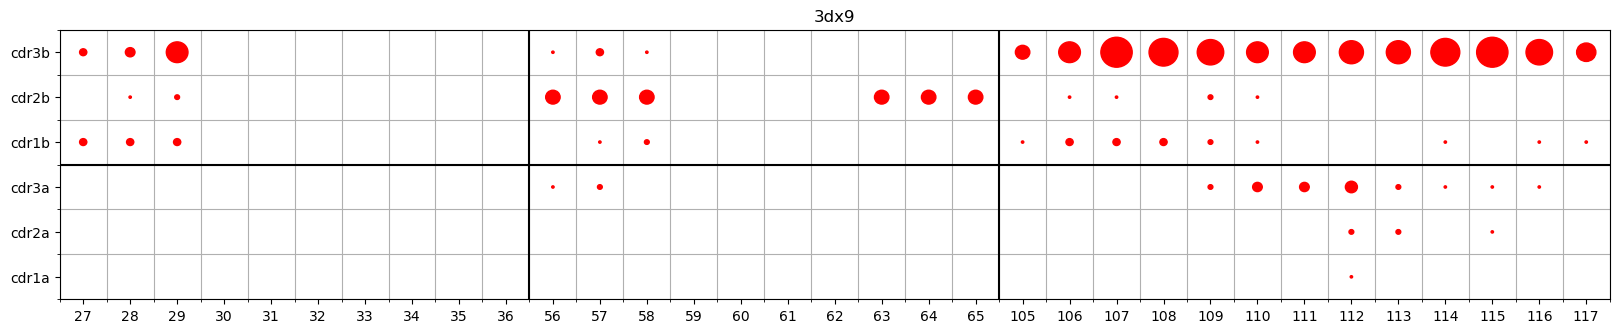

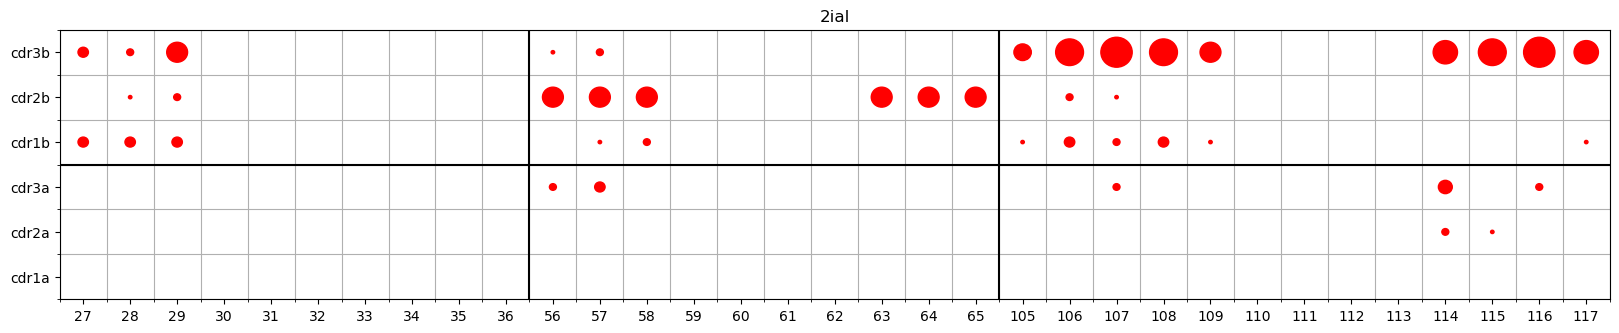

In [10]:
for pdb in ['3qh3','6cph','3dx9','2ial']:
       pdb_df = DF_b[pdb]
       N,M = pdb_df.shape
       ylabels = pdb_df.index
       xlabels = pdb_df.columns

       x, y = np.meshgrid(np.arange(M), np.arange(N))
       s = pdb_df.values
       c = np.random.rand(N, M)-0.5

       fig, ax = plt.subplots(figsize=(20,3.5))

       R = s/s.max()/3
       circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
       col = PatchCollection(circles, color='red')
       ax.add_collection(col)

       ax.set(xticks=np.arange(M), yticks=np.arange(N),
              xticklabels=xlabels, yticklabels=ylabels)
       ax.set_xticks(np.arange(M+1)-0.5, minor=True)
       ax.set_yticks(np.arange(N+1)-0.5, minor=True)
       ax.grid(which='minor')
       ax.axhline(2.5, c='k')
       ax.axvline(9.5, c='k')
       ax.axvline(19.5, c='k')

       # fig.colorbar(col)
       plt.title(pdb)
       plt.show()

In [11]:
nodes_list = ['a_' + x for x in cdr1 + cdr2 + cdr3]
nodes_list1 = ['b_' + x for x in cdr1 + cdr2 + cdr3]
nodes_list = nodes_list + nodes_list1
print(nodes_list)

['a_27', 'a_28', 'a_29', 'a_30', 'a_31', 'a_32', 'a_33', 'a_34', 'a_35', 'a_36', 'a_56', 'a_57', 'a_58', 'a_59', 'a_60', 'a_61', 'a_62', 'a_63', 'a_64', 'a_65', 'a_105', 'a_106', 'a_107', 'a_108', 'a_109', 'a_110', 'a_111', 'a_112', 'a_113', 'a_114', 'a_115', 'a_116', 'a_117', 'b_27', 'b_28', 'b_29', 'b_30', 'b_31', 'b_32', 'b_33', 'b_34', 'b_35', 'b_36', 'b_56', 'b_57', 'b_58', 'b_59', 'b_60', 'b_61', 'b_62', 'b_63', 'b_64', 'b_65', 'b_105', 'b_106', 'b_107', 'b_108', 'b_109', 'b_110', 'b_111', 'b_112', 'b_113', 'b_114', 'b_115', 'b_116', 'b_117']


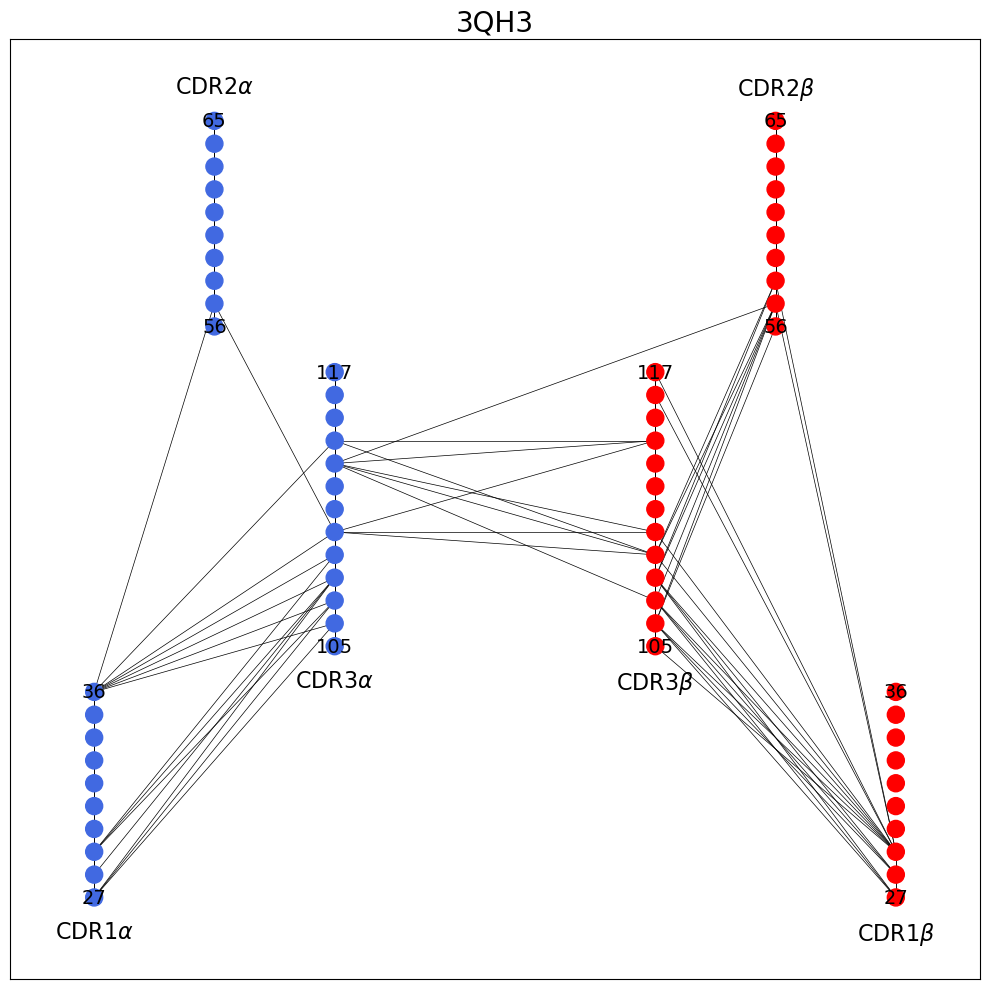

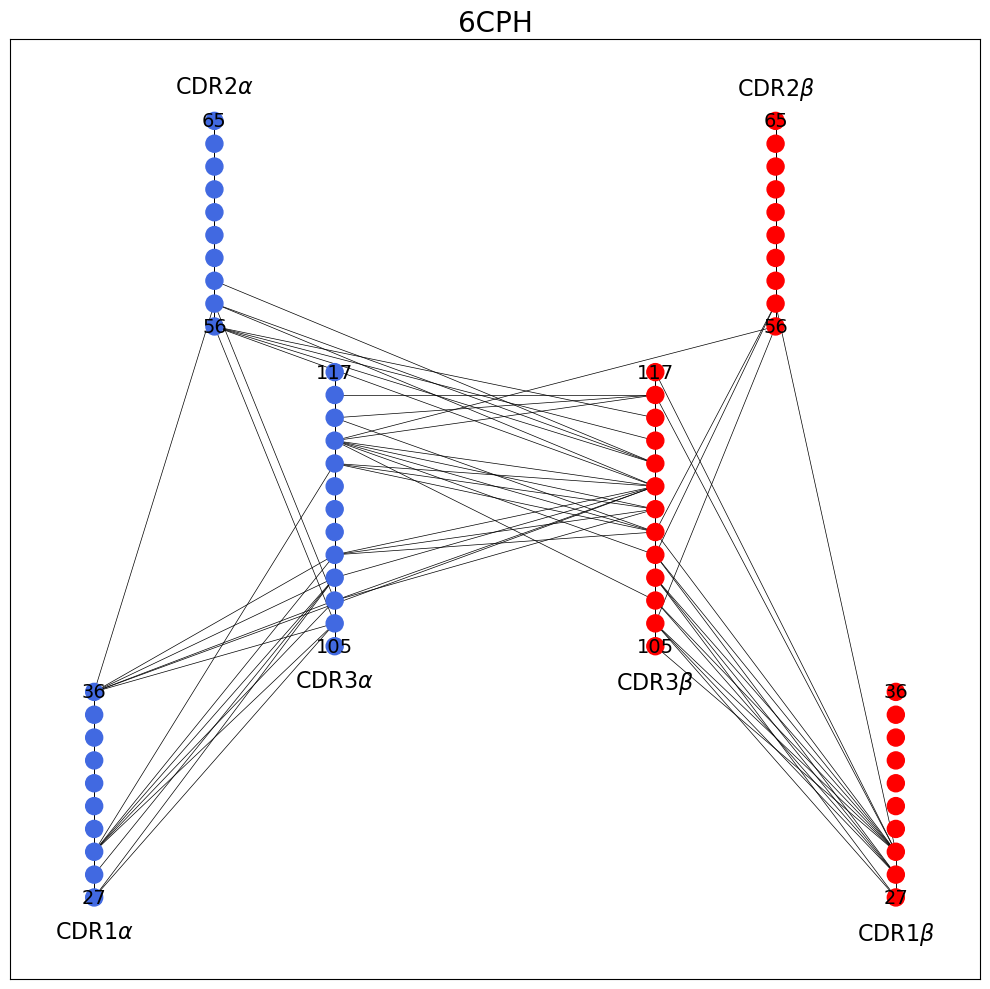

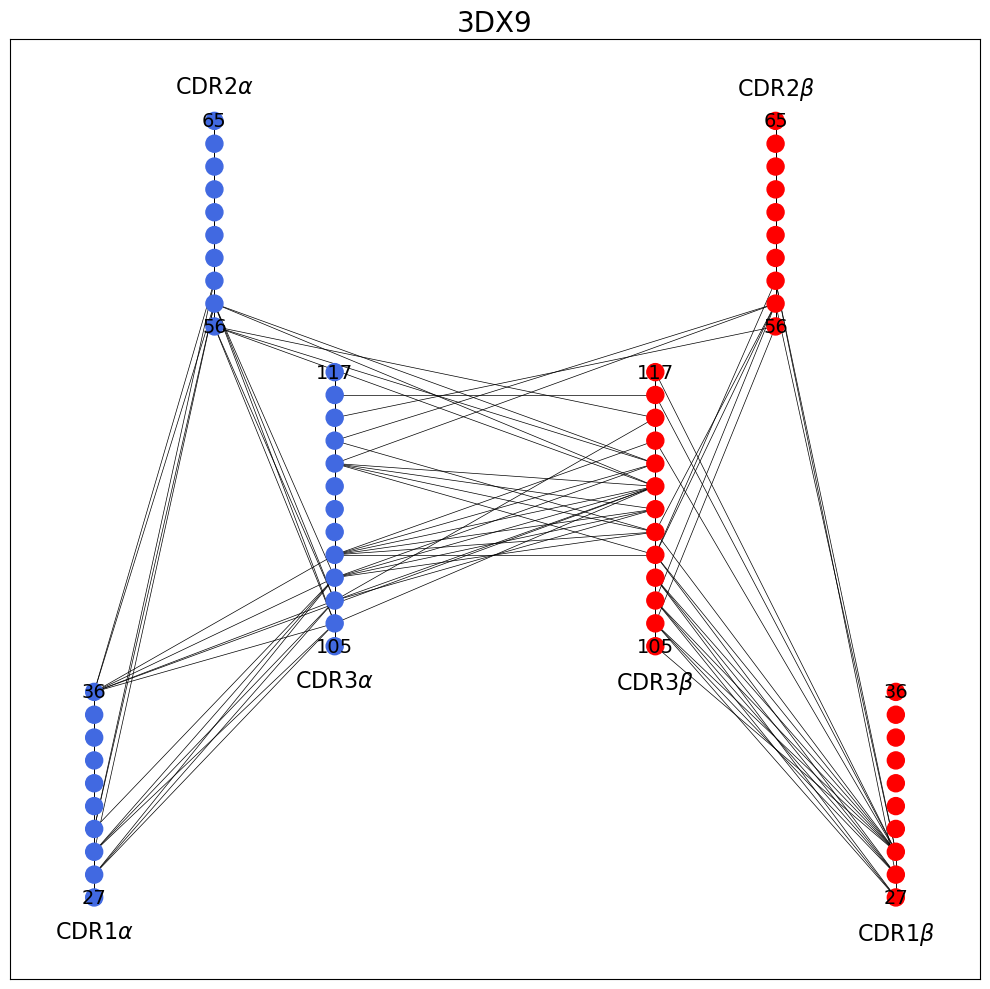

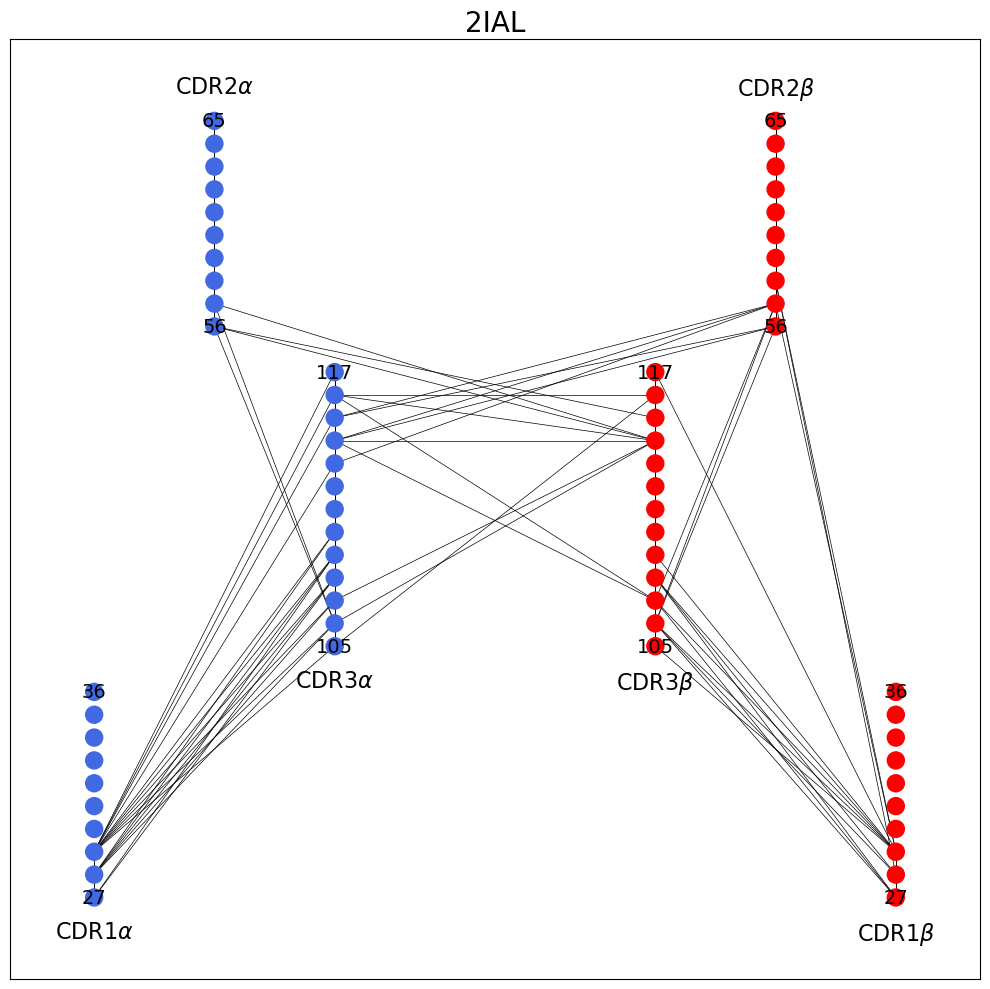

In [12]:
for pdb in ['3qh3','6cph','3dx9','2ial']:
    edges = []
    for resp in inter_distances[pdb]:
        if inter_distances[pdb][resp] < 10:
            a, b = 'a_' + resp[0], 'b_' + resp[1]
            if (a in nodes_list) and (b in nodes_list) and (a!=b):
                edges.append((a,b))
    for resp in intra_distances_a[pdb]:
        if intra_distances_a[pdb][resp] < 10:
            a1, a2 = 'a_' + resp[0], 'a_' + resp[1]
            if (a1 in nodes_list) and (a2 in nodes_list) and (a1 != a2):
                edges.append((a1,a2))
    for resp in intra_distances_b[pdb]:
        if intra_distances_b[pdb][resp] < 10:
            b1, b2 = 'b_' + resp[0], 'b_' + resp[1]
            if (b1 in nodes_list) and (b2 in nodes_list) and (b1!=b2):
                edges.append((b1,b2))
    plot_graph(nodes_list, edges, pdb)

{'a_27': (0, 1), 'a_28': (1, 2), 'a_29': (2, 3), 'a_30': (3, 4), 'a_31': (4, 5), 'a_32': (5, 6), 'a_33': (6, 7), 'a_34': (7, 8), 'a_35': (8, 9), 'a_36': (9, 10), 'a_56': (0, 1), 'a_57': (1, 2), 'a_58': (2, 3), 'a_59': (3, 4), 'a_60': (4, 5), 'a_61': (5, 6), 'a_62': (6, 7), 'a_63': (7, 8), 'a_64': (8, 9), 'a_65': (9, 10), 'a_105': (0, 1), 'a_106': (1, 2), 'a_107': (2, 3), 'a_108': (3, 4), 'a_109': (4, 5), 'a_110': (5, 6), 'a_111': (6, 7), 'a_112': (7, 8), 'a_113': (8, 9), 'a_114': (9, 10), 'a_115': (10, 11), 'a_116': (11, 12), 'a_117': (12, 13), 'b_27': (0, 1), 'b_28': (1, 2), 'b_29': (2, 3), 'b_30': (3, 4), 'b_31': (4, 5), 'b_32': (5, 6), 'b_33': (6, 7), 'b_34': (7, 8), 'b_35': (8, 9), 'b_36': (9, 10), 'b_56': (0, 1), 'b_57': (1, 2), 'b_58': (2, 3), 'b_59': (3, 4), 'b_60': (4, 5), 'b_61': (5, 6), 'b_62': (6, 7), 'b_63': (7, 8), 'b_64': (8, 9), 'b_65': (9, 10), 'b_105': (0, 1), 'b_106': (1, 2), 'b_107': (2, 3), 'b_108': (3, 4), 'b_109': (4, 5), 'b_110': (5, 6), 'b_111': (6, 7), 'b_112':

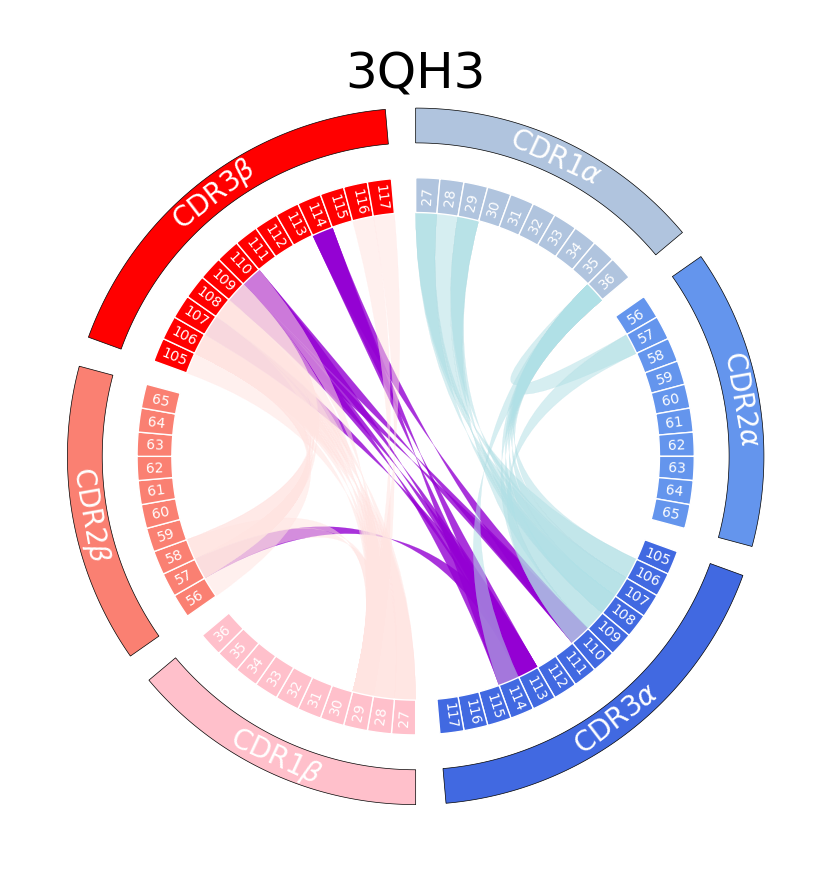

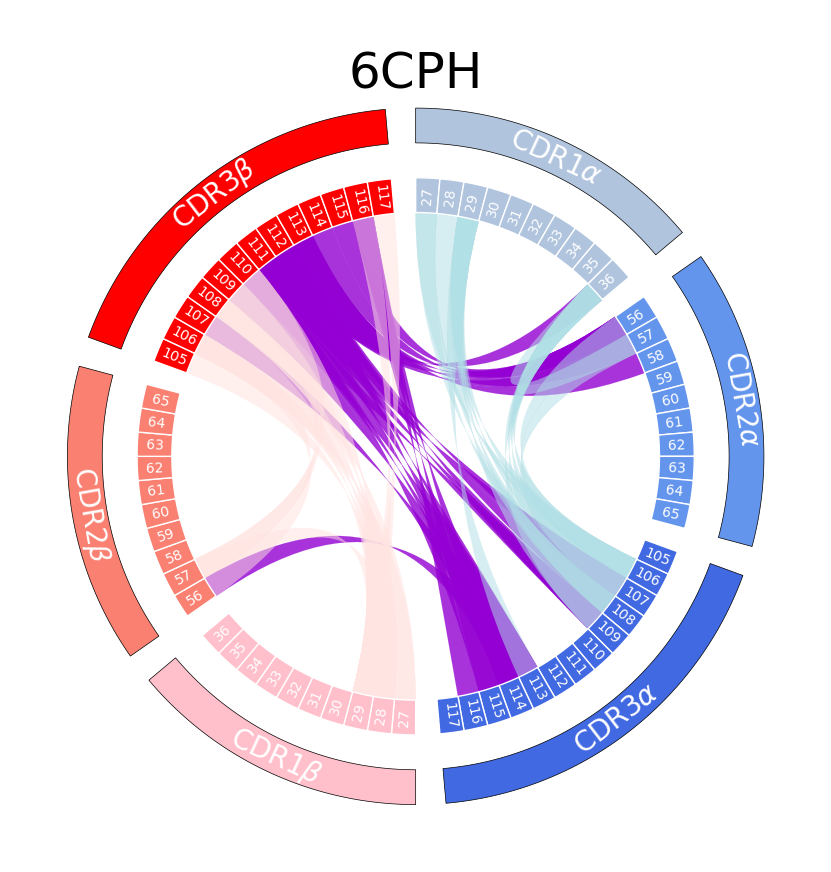

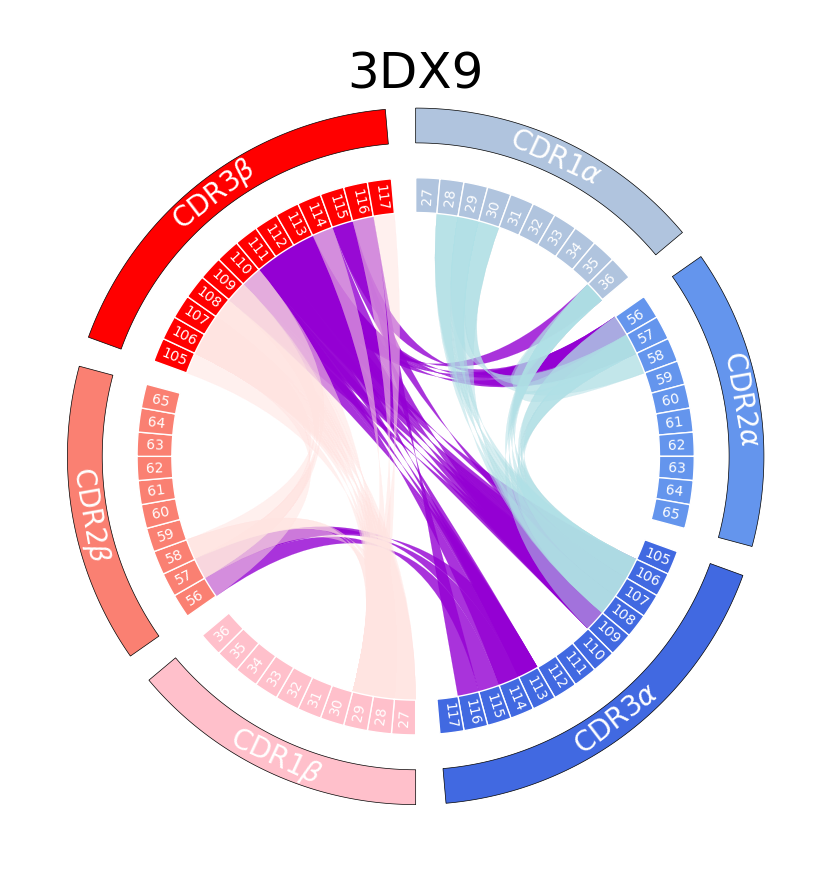

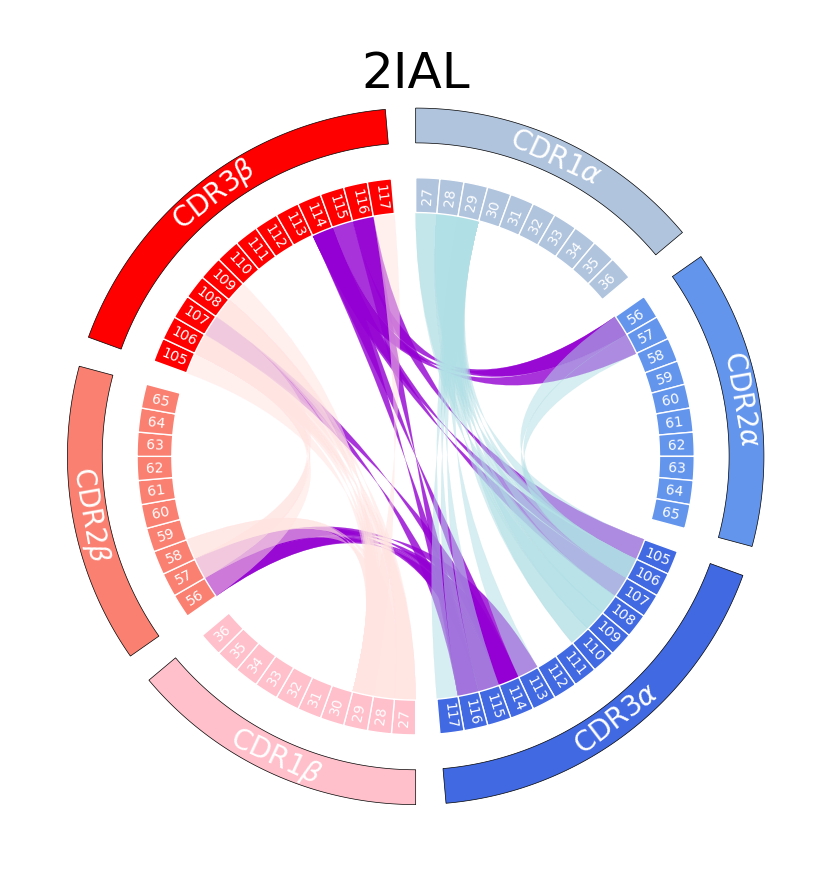

In [30]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

for pdb in ['3qh3','6cph','3dx9','2ial']:
    edges = []
    for resp in inter_distances[pdb]:
        if inter_distances[pdb][resp] < 10:
            a, b = 'a_' + resp[0], 'b_' + resp[1]
            if (a in nodes_list) and (b in nodes_list) and (a!=b):
                edges.append((a,b))
    for resp in intra_distances_a[pdb]:
        if intra_distances_a[pdb][resp] < 10:
            a1, a2 = 'a_' + resp[0], 'a_' + resp[1]
            if (a1 in nodes_list) and (a2 in nodes_list) and (a1 != a2):
                edges.append((a1,a2))
    for resp in intra_distances_b[pdb]:
        if intra_distances_b[pdb][resp] < 10:
            b1, b2 = 'b_' + resp[0], 'b_' + resp[1]
            if (b1 in nodes_list) and (b2 in nodes_list) and (b1!=b2):
                edges.append((b1,b2))

    # Initialize Circos sectors
    sectors = {r"CDR1$\alpha$": len(cdr1), r"CDR2$\alpha$": len(cdr2), r"CDR3$\alpha$": len(cdr3), 
            r"CDR1$\beta$": len(cdr1), r"CDR2$\beta$": len(cdr2), r"CDR3$\beta$": len(cdr3),}
    circos = Circos(sectors, space=5)

    name2color = {r"CDR1$\alpha$": 'lightsteelblue', r"CDR2$\alpha$": 'cornflowerblue', r"CDR3$\alpha$": 'royalblue',
                  r"CDR1$\beta$": 'pink', r"CDR2$\beta$": 'salmon', r"CDR3$\beta$": 'red', 
            }

    labels = {r"CDR1$\alpha$": cdr1, r"CDR2$\alpha$": cdr2, r"CDR3$\alpha$": cdr3, 
            r"CDR1$\beta$": cdr1, r"CDR2$\beta$": cdr2, r"CDR3$\beta$": cdr3}

    resname_to_pos = {}

    for sector in circos.sectors:
        # Plot sector name
        # sector.text(sector.name, r=110, size=15)
        track = sector.add_track((90, 100))
        track.axis(fc=name2color[sector.name])
        track.text(sector.name, color="white", size=20)
        track2 = sector.add_track((70, 80))
        for i in range(int(track2.size)):
            resname = labels[sector.name][i]
            start, end = i, i + 1
            track2.rect(start, end, fc=name2color[sector.name], ec="white", lw=1)
            track2.text(resname, (end + start) / 2,  color="white", orientation="vertical")
            resname_to_pos['_'.join([sector.name.split('\\')[1][0], resname])] = (start,end)
    print(resname_to_pos)

    intra_a = []
    intra_b = []
    inter = []

    for edgepair in edges:
        x1,x2 = edgepair

        if x1.split('_')[0] == 'a': c1 = '$\\alpha$'
        else: c1 = '$\\beta$'
        if x1.split('_')[1] in cdr1: cc1 = 'CDR1'
        elif x1.split('_')[1] in cdr2: cc1 = 'CDR2'
        else: cc1 = 'CDR3'
        S1 = cc1 + c1

        if x2.split('_')[0] == 'a': c2 = '$\\alpha$'
        else: c2 = '$\\beta$'
        if x2.split('_')[1] in cdr1: cc2 = 'CDR1'
        elif x2.split('_')[1] in cdr2: cc2 = 'CDR2'
        else: cc2 = 'CDR3'    
        S2 = cc2 + c2

        # print(edgepair, S1, S2)

        

        if S1 != S2: 
            if c1 != c2:
                inter.append(((S1, *resname_to_pos[x1]), (S2, *resname_to_pos[x2])))
            else:
                if c1 == '$\\alpha$':
                    intra_a.append(((S1, *resname_to_pos[x1]), (S2, *resname_to_pos[x2])))
                else:
                    intra_b.append(((S1, *resname_to_pos[x1]), (S2, *resname_to_pos[x2])))
    for i in inter:
        circos.link(*i, color='darkviolet', alpha=0.8)
    for i in intra_a:
        circos.link(*i, color='powderblue', alpha=0.3)
    for i in intra_b:
        circos.link(*i, color='mistyrose', alpha=0.3)

    circos.text(pdb.upper(), r=110, fontsize = 36)
    # fig=circos.plotfig()
    circos.savefig('figures/' + pdb + '_contacts_circos.png')